In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.linalg as la
from matplotlib.patches import Ellipse
import matplotlib as mpl

<h4> Read Image and Change color to Gray</h4>

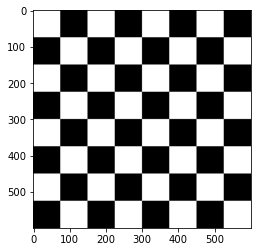

In [2]:
image=cv2.imread('harris.jpg')
plt.imshow(image)

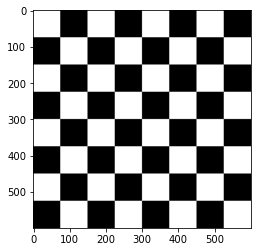

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = plt.get_cmap('gray'))

<h4>Gaussian kernel(with derivative) </h4>

[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]


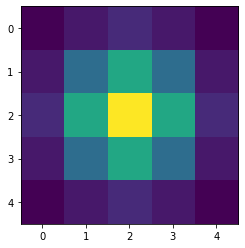

In [4]:
sigma_square=1
x,y = np.meshgrid(np.linspace(-2,2,5), np.linspace(-2,2,5))
gaus = (np.exp(-(x**2+y**2)/(2*sigma_square)))
print(gaus)
plt.imshow(gaus)

<h4> Gaussian kernels with x and y derivatives  </h4>

In [5]:
gausx = x*(np.exp(-(x**2+y**2)/(2*sigma_square)))
gausy = y*(np.exp(-(x**2+y**2)/(2*sigma_square)))


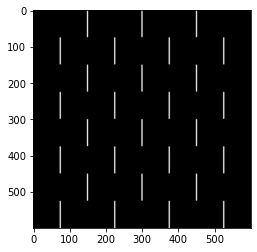

In [6]:
dx=cv2.filter2D(gray_image, -1, gausx)
plt.imshow(dx, cmap = plt.get_cmap('gray'))

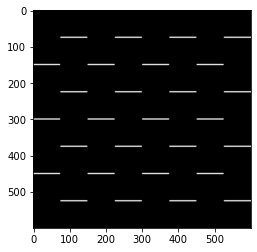

In [7]:
dy=cv2.filter2D(gray_image, -1, gausy)
plt.imshow(dy, cmap = plt.get_cmap('gray'))

In [8]:
shape=gray_image.shape
print(shape)
height=shape[0]
width=shape[1]

(600, 600)


<h4> Product of derivatives </h4>

In [9]:
Ixx=dx*dx
Iyy=dy*dy
Ixy=dx*dy

<h4>Sum of products of derivatives at each pixel </h4>

In [10]:
Sxx=cv2.filter2D(Ixx, -1, gaus)
Syy=cv2.filter2D(Iyy, -1, gaus )
Sxy=cv2.filter2D(Ixy, -1, gaus)

<h4>Create second moment matrix and compute corner response function </h4>

In [12]:
alpha = 0.04;
Threshold = 10000;
im=np.zeros((height, width))
for x in range(0,height):
    for y in range(0, width):
        matrix=np.array([[Sxx[x][y],Sxy[x][y]],[Syy[x][y],Sxy[x][y]]])
        r=np.linalg.det(matrix) - (alpha * np.square(np.trace(matrix)))
        #print(x, y, r)
        if (r > Threshold):
            im[x][y] = r;
        
                            

<h4>Compute nonmax supression and show points on a plot </h4>

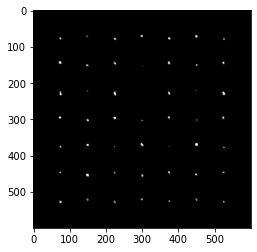

In [13]:
kernel=np.array([[1, 1, 1],[1, 0, 1],[1, 1, 1]], dtype = np.uint8)
img_dilation = cv2.dilate(im, kernel)
plt.imshow(img_dilation, cmap = plt.get_cmap('gray'))

<h4> Show corners on image </h4>

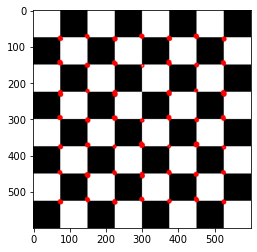

In [32]:
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
corner_image = np.copy(image_copy)
for j in range(0, img_dilation.shape[0]):
    for i in range(0, img_dilation.shape[1]):
        if(img_dilation[j,i] > Threshold):
            cv2.circle(corner_image, (i, j), 4, (255,0,0), 1)
plt.imshow(corner_image)


<h4> Calculating eigenvalues and eigenvectors and drawing ellipses </h4>

<ipython-input-33-a653acb31dd7>:14: RuntimeWarning: invalid value encountered in power
  w=eigvals[0]**(-1/2)
<ipython-input-33-a653acb31dd7>:15: RuntimeWarning: invalid value encountered in power
  h=eigvals[1]**(-1/2)
<ipython-input-33-a653acb31dd7>:9: RuntimeWarning: invalid value encountered in power
  h=eigvals[0]**(-1/2)
C:\Users\MSI-ALPX\anaconda3\lib\site-packages\matplotlib\transforms.py:1999: ComplexWarning: Casting complex values to real discards the imaginary part
  scale_mtx = np.array(


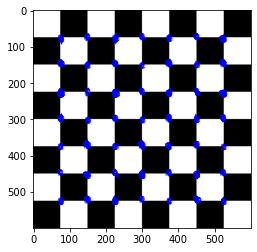

In [33]:
fig, ax = plt.subplots()
ax.imshow(image)
for x in range(0,height):
    for y in range(0, width):
        matrix=np.array([[Sxx[x][y],Sxy[x][y]],[Syy[x][y],Sxy[x][y]]])
        eigvals, eigvecs = la.eig(matrix)
        if(eigvals[0]<eigvals[1]):
                    w=eigvals[1]**(-1/2)
                    h=eigvals[0]**(-1/2)
                    #Not sure how to use eigenvectors to determine angles
                    ells = Ellipse(xy=[y,x], width=w, height=h,angle=180,edgecolor='b', lw=4, facecolor='none')
                    ax.add_artist(ells)                  
        if(eigvals[0]>=eigvals[1]):
                    w=eigvals[0]**(-1/2)
                    h=eigvals[1]**(-1/2)
                    ells = Ellipse(xy=[y,x], width=w, height=h,angle=180,edgecolor='b', lw=4, facecolor='none')
                    ax.add_artist(ells)                    
plt.show()         